In [1]:
from bmtool.singlecell import Profiler

template_dir = '../../components/templates'
mechanism_dir = '../../components/mechanisms'

profiler = Profiler(template_dir=template_dir, mechanism_dir=mechanism_dir)

def passive_properties(Cell, **kwargs):
    time_vec, voltage_vec = profiler.passive_properties(Cell, **kwargs)
    return time_vec, voltage_vec

def current_injection(Cell, noise=False, **kwargs):
    post_init_function = 'insert_mechs(0)' if noise else None
    time_vec, voltage_vec = profiler.current_injection(
        Cell, post_init_function=post_init_function, **kwargs
    )
    return time_vec, voltage_vec

def fi_curve(Cell, noise=False, **kwargs):
    post_init_function = 'insert_mechs(0)' if noise else None
    amp_vec, spike_vec = profiler.fi_curve(
        Cell, post_init_function=post_init_function, **kwargs
    )
    return amp_vec, spike_vec

In [2]:
Cell = 'CP_Cell'

noise = True
inj_amp = 50
inj_delay = 400
inj_dur = 1000
tstop = 1700

Injection location: self.cell.soma[0](0.5)
Recording: self.cell.soma[0](0.5)._ref_v
Running passive property simulation...

V Rest: -70.28 (mV)
Resistance: 128.04 (MOhms)
tau: 31.80 (ms)

V_rest Calculation: Voltage taken at time 200.0(ms)
-70.28 (mV)

R_in Calculation: [(dV/dI)] = (v_start-v_final)/(i_start-i_final)
(-70.28-(-83.08))/(0-(-0.1))
12.8 (mV) /0.1 (nA)
128.04 (MOhms)

Tau Calculation: [(s) until 63.2% change in mV]
(mV at inj_start_time (200)) - ((mV at inj_time  - mV at inj_final (1200)) * 0.632)
(-70.28) - (-70.28--83.08)*0.632 = -78.37
Time where mV == -78.37 = 231.8(ms) | (32000.0 - v_start_time (200))/1000
31.8 (ms)



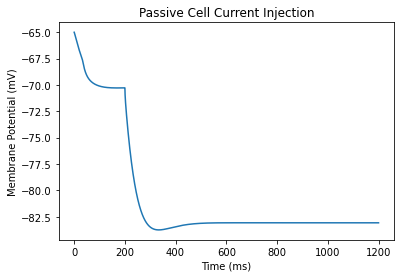

In [3]:
time_vec, voltage_vec = passive_properties(**{'Cell': Cell})

Injection location: self.cell.soma[0](0.5)
Recording: self.cell.soma[0](0.5)._ref_v
current clamp simulation running...


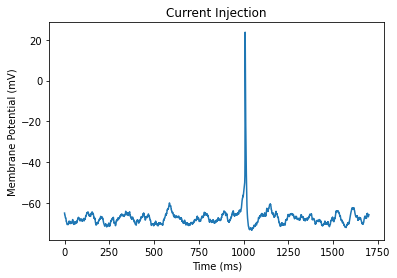

In [4]:
time_vec, voltage_vec = current_injection(**{
        'Cell': Cell, 'noise': True,
        'inj_amp': inj_amp, 'inj_delay': inj_delay,
        'inj_dur': inj_dur, 'tstop': tstop
    }
)

Injection location: cell.soma[0](0.5)
Recording: cell.soma[0](0.5)._ref_v
Running FI curve simulation...

Results
Rates: [0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9, 1.0]
Spikes: [0, 2, 4, 6, 12, 14, 16, 19, 20, 21, 22]



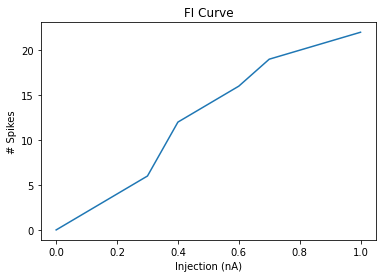

In [5]:
amp_vec, spike_vec = fi_curve(**{'Cell': Cell, 'noise': True})